In [26]:
import pandas as pd 
import ast 
import numpy as np 
import matplotlib.pyplot as plt
from collections import defaultdict


In [60]:
db_fluff = pd.read_csv('../data/no_fluffs.csv')
db_so = pd.read_csv('../data/so.csv')
db_so.drop(labels='Unnamed: 0', axis=1, inplace=True)
db_so.rename(columns={"job_type": "Time", "role": "Role", 'company_size': 'Size',
                      "company_type":"Company", "tags": "Tags", 'industry': 'Industry'}, inplace=True)


def match_salaries(salary_str):
    if isinstance(salary_str, float):
        return 0.0, 0.0, None
    if '-' in salary_str:
        min_s, _, max_s, currency  = salary_str.strip().split(' ')
    else:
        min_s, currency  = salary_str.strip().split(' ')
        max_s = min_s
    min_s = min_s.lower()
    max_s = max_s.lower()
    if 'k' in min_s:
        min_s = float(min_s.replace('k', ''))*1e3 
    elif 'm' in min_s:
        min_s = float(min_s.replace('m', ''))*1e6
    else:
        min_s = int(min_s)
    if 'k' in max_s:
        max_s = float(max_s.replace('k', ''))*1e3 
    elif 'm' in max_s:
        max_s = float(max_s.replace('m', ''))*1e6
    else:
        max_s = float(max_s)
                    
                    
    return [min_s, max_s, currency]                    
                    
res = db_fluff['Salary'].apply(match_salaries).values
min_s, max_s, curr_s = [], [], []
for mins, maxs, currs in res:
    min_s.append(mins)
    max_s.append(maxs)
    curr_s.append(currs)

print(len(curr_s), len(min_s), len(max_s), len(db_fluff))
db_fluff['Min_Salary'] = min_s
db_fluff['Max_Salary'] = max_s
db_fluff['Currency'] = curr_s


def filter_tags(str_tag_list):
    tag_list = ast.literal_eval(str_tag_list)
    return [x.lower().strip() for x in tag_list]


db_fluff['Tags'] = db_fluff['Tags'].apply(filter_tags)
db_so['Tags'] = db_so['Tags'].apply(filter_tags)

1074 1074 1074 1074


In [61]:
db_fluff.head()

,Role,Tags,Additional,Salary,Locations,Min_Salary,Max_Salary,Currency
0,React Frontend Developer,"[react, javascript, css, git, rest, html5, nod...","{' Job profile ': ' Mainly new features ', ' S...",600k - 1.2M HUF,Budapest,600000.0,1200000.0,HUF
1,Front End Developer,"[angular, javascript, css, html, react, design...","{' Job profile ': ' Mainly new features ', ' S...",8000 - 15000 PLN,Kraków,8000.0,15000.0,PLN
2,Frontend Developer,"[javascript, jquery, angular, css, html, redux...","{' Job profile ': ' Mainly new features ', ' S...",900 - 1300 PLN,"Kraków, Katowice",900.0,1300.0,PLN
3,Python Developer,"[python, django, postgresql, experience in dev...","{' Start ': ' 2020-05-01 ', ' Contract duratio...",12000 - 14000 PLN,Warszawa,12000.0,14000.0,PLN
4,Mid/Senior Java Developer (with English),"[java, spring, hibernate, javascript, angular,...","{' Job profile ': ' Mainly new features ', ' S...",8000 - 16000 PLN,Wrocław,8000.0,16000.0,PLN


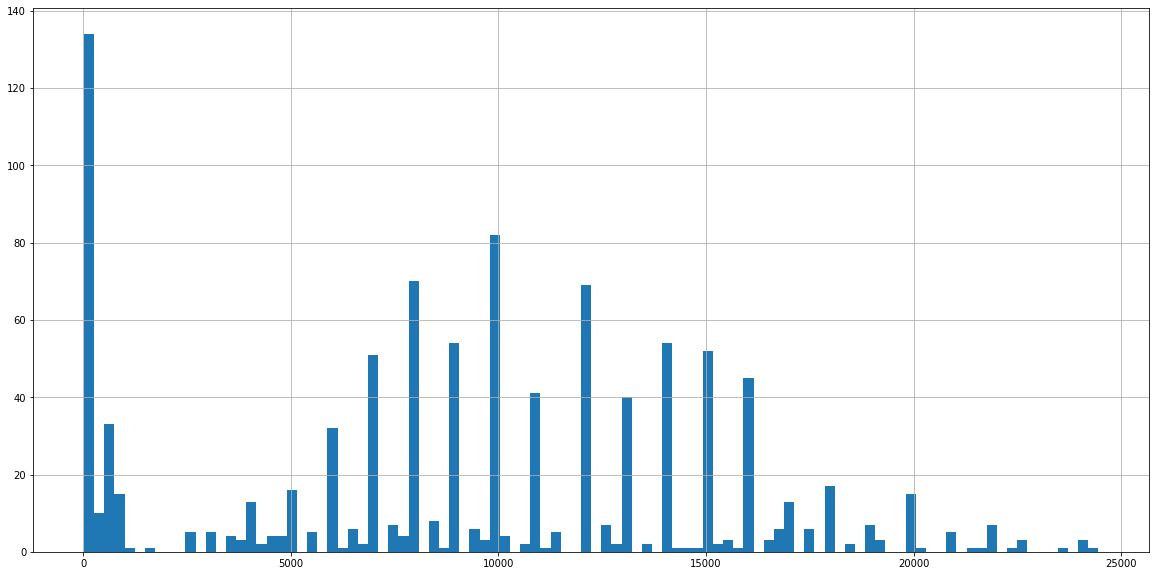

In [62]:
db_fluff['Min_Salary'][db_fluff['Currency'] == 'PLN'].hist(bins=100,
                                                          figsize=(20,10))

In [64]:
db_so.head()

,Time,experience,Role,Industry,Size,Company,Tags
0,Full-time,"Mid-Level, Senior",None,"Online Media, Software Development / Engineeri...",1k–5k people,Private,"[amazon-web-services, aws, cloud, go, python]"
1,Full-time,"Mid-Level, Senior",DevOps,"Digital Health, Health Care, Healthcare",201–500 people,VC Funded,"[python, google-cloud-platform, postgresql, do..."
2,Full-time,None,Mobile Developer,None,None,None,"[reactjs, ios, swift]"
3,Full-time,None,None,None,None,None,"[amazon-web-services, go, php]"
4,Full-time,None,"Backend Developer, Mobile Developer",None,None,None,"[android, java, rest]"
